Analyze 15/30-34 neq switching

In [1]:
from perses.analysis.analysis import Analysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymbar
%matplotlib inline
import os
import itertools
from tqdm import tqdm_notebook
import pandas as pd
import tqdm
import warnings
warnings.filterwarnings('ignore')
from simtk.openmm import unit
from openmmtools.constants import kB
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole
import pandas as pd
import pickle

In [2]:
def analyze(forward_accumulated, reverse_accumulated): 
    # Compute dg, ddg
    dg, ddg = pymbar.bar.BAR(forward_accumulated, reverse_accumulated)
    return dg, ddg

def analyze_bootstrap(d_works):
    d_dgs_phase = {}
    complex_dg, complex_ddg = analyze(d_works['complex']['forward'], d_works['complex']['reverse'])
    apo_dg, apo_ddg = analyze(d_works['apo']['forward'], d_works['apo']['reverse'])
    d_dgs_phase['complex'] = (complex_dg, complex_ddg)
    d_dgs_phase['apo'] = (apo_dg, apo_ddg)
    
    binding_dg = complex_dg - apo_dg
#     binding_ddg = (apo_ddg**2 + complex_ddg**2)**0.5
    return d_dgs_phase, binding_dg
    
def plot(forward_work, reverse_work, dg, ddg, dir_num, phase, output_dir, title):
    # Substract offset
    print("subtracting offset")
    forward_work_offset = []
    for cycle in forward_work:
        forward_work_offset.append(np.array([val - cycle[0] for val in cycle[1:]]))
    forward_work_offset = np.array(forward_work_offset)

    reverse_work_offset = []
    for cycle in reverse_work:
        reverse_work_offset.append(np.array([val - cycle[0] for val in cycle[1:]]))
    reverse_work_offset = np.array(reverse_work_offset)

    # Plot work trajectories
    print("plotting work trajs")
    for cycle in forward_work_offset:
        x = [(i+1)*4e-4 for i in range(len(list(cycle)))]
        y = cycle
        plt.plot(x, y, color=sns.color_palette()[0])
    for cycle in reverse_work_offset:
        x = [(i+1)*4e-4 for i in range(len(list(cycle)))]
        y = -cycle
        plt.plot(x, y, color=sns.color_palette()[1])
    plt.xlabel("$t_{neq}$ (ns)")
    plt.ylabel("work (kT)")
    plt.title(f"{title} {phase}")
    plt.savefig(os.path.join(output_dir, f"{dir_num}_{phase}_work_traj.png"), dpi=500)
    print(f"saved to: {os.path.join(output_dir, f'{dir_num}_{phase}_work_traj.png')}")
    plt.clf()
    
    # Plot work distributions
    print("plotting work distrib")
    accumulated_forward = [cycle[-1] for cycle in forward_work_offset]
    accumulated_reverse = [-cycle[-1] for cycle in reverse_work_offset]
    sns.distplot(accumulated_forward)
    sns.distplot(accumulated_reverse)
    plt.axvline(dg)
    plt.axvline(dg + ddg, linestyle='dashed')
    plt.axvline(dg - ddg, linestyle='dashed')
    plt.xlabel("work (kT)")
    plt.ylabel("p(w)")
    plt.title(f"{title} {phase}")
    plt.savefig(os.path.join(output_dir, f"{dir_num}_{phase}_work_dist.png"), dpi=500)
    print(f"saved to: {os.path.join(output_dir, f'{dir_num}_{phase}_work_dist.png')}")
    plt.clf()
    

##  N439K

In [59]:
# Load data into dicts and plot 
titles = ["N439K"]
phases = ['complex', 'apo']
directions = ['forward', 'reverse']
d_input = {}
dir_num = 15
forward = 30
for i in tqdm_notebook([forward]):
    print(f"dir: {i}")
    d_works = {"complex": {}, "apo":{}}
    d_combined_works = {"complex": {}, "apo":{}}
    for phase in phases:
        for direction in directions:
            all_arrays = []
            for j in range(100):
                print(f"job: {j}")
                path = f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{i}/{i}_{phase}_{j}_{direction}.npy"
                try:
                    if os.path.exists(path):
                        with open(path, 'rb') as f:
                            array = np.load(f)
                            all_arrays.append(array)
                except:
                    continue
            print(len(all_arrays))
            if all_arrays:
                combined = np.concatenate(all_arrays)
                accumulated = np.array([cycle[-1] - cycle[0] for cycle in combined])
                combined = np.array([cycle[0::100] for cycle in combined])
                d_combined_works[phase][direction] = combined
                d_works[phase][direction] = accumulated
    
    d_input[i] = d_works
    
    # Plot
    complex_dg, complex_ddg = analyze(d_works['complex']['forward'], d_works['complex']['reverse'])
    apo_dg, apo_ddg = analyze(d_works['apo']['forward'], d_works['apo']['reverse'])
    plot(d_combined_works['complex']['forward'], d_combined_works['complex']['reverse'], complex_dg, complex_ddg, i, 'complex', os.path.dirname(path), titles[i-forward])
    plot(d_combined_works['apo']['forward'], d_combined_works['apo']['reverse'], apo_dg, apo_ddg, i, 'apo', os.path.dirname(path), titles[i-forward])
        

  0%|          | 0/1 [00:00<?, ?it/s]

dir: 30
job: 0
job: 1
job: 2
job: 3
job: 4
shape: (1, 250001)
array.shape: (250001,)
job: 5
shape: (1, 250001)
array.shape: (250001,)
job: 6
shape: (1, 250001)
array.shape: (250001,)
job: 7
shape: (1, 250001)
array.shape: (250001,)
job: 8
shape: (1, 250001)
array.shape: (250001,)
job: 9
shape: (1, 250001)
array.shape: (250001,)
job: 10
shape: (1, 250001)
array.shape: (250001,)
job: 11
shape: (1, 250001)
array.shape: (250001,)
job: 12
shape: (1, 250001)
array.shape: (250001,)
job: 13
shape: (1, 250001)
array.shape: (250001,)
job: 14
shape: (1, 250001)
array.shape: (250001,)
job: 15
shape: (1, 250001)
array.shape: (250001,)
job: 16
shape: (1, 250001)
array.shape: (250001,)
job: 17
shape: (1, 250001)
array.shape: (250001,)
job: 18
shape: (1, 250001)
array.shape: (250001,)
job: 19
shape: (1, 250001)
array.shape: (250001,)
job: 20
shape: (1, 250001)
array.shape: (250001,)
job: 21
shape: (1, 250001)
array.shape: (250001,)
job: 22
shape: (1, 250001)
array.shape: (250001,)
job: 23
shape: (1, 2

shape: (1, 250001)
array.shape: (250001,)
job: 98
shape: (1, 250001)
array.shape: (250001,)
job: 99
shape: (1, 250001)
array.shape: (250001,)
96
job: 0
job: 1
job: 2
shape: (1, 250001)
array.shape: (250001,)
job: 3
shape: (1, 250001)
array.shape: (250001,)
job: 4
shape: (1, 250001)
array.shape: (250001,)
job: 5
shape: (1, 250001)
array.shape: (250001,)
job: 6
shape: (1, 250001)
array.shape: (250001,)
job: 7
shape: (1, 250001)
array.shape: (250001,)
job: 8
shape: (1, 250001)
array.shape: (250001,)
job: 9
shape: (1, 250001)
array.shape: (250001,)
job: 10
shape: (1, 250001)
array.shape: (250001,)
job: 11
shape: (1, 250001)
array.shape: (250001,)
job: 12
shape: (1, 250001)
array.shape: (250001,)
job: 13
shape: (1, 250001)
array.shape: (250001,)
job: 14
shape: (1, 250001)
array.shape: (250001,)
job: 15
shape: (1, 250001)
array.shape: (250001,)
job: 16
shape: (1, 250001)
array.shape: (250001,)
job: 17
shape: (1, 250001)
array.shape: (250001,)
job: 18
shape: (1, 250001)
array.shape: (250001,)

subtracting offset
plotting work trajs
saved to: /data/chodera/zhangi/perses_benchmark/neq/15/30/30_complex_work_traj.png
plotting work distrib
saved to: /data/chodera/zhangi/perses_benchmark/neq/15/30/30_complex_work_dist.png
subtracting offset
plotting work trajs
saved to: /data/chodera/zhangi/perses_benchmark/neq/15/30/30_apo_work_traj.png
plotting work distrib
saved to: /data/chodera/zhangi/perses_benchmark/neq/15/30/30_apo_work_dist.png


<Figure size 432x288 with 0 Axes>

In [60]:
# Bootstrap works
N_bootstraps = 10000
phases = ['complex', 'apo']
directions = ['forward', 'reverse']
dgs_phase = {}
ddgs = {}
for i in [forward]:
    dgs_phase_all = []
    ddgs_all = []
    for _ in tqdm_notebook(range(N_bootstraps)):
        # Initialize data structure for works
        d_works = {"complex": {"forward":{}, "reverse":{}}, "apo":{"forward":{}, "reverse":{}}}

        # Save subsampled works
        for phase in phases:
            for direction in directions:
                work_array = np.array(d_input[i][phase][direction])
                num_samples = work_array.shape[0]
                subsample_indices = np.random.choice(range(num_samples), num_samples)
                d_works[phase][direction] = work_array[subsample_indices]
        d_dgs_phase, binding_dg = analyze_bootstrap(d_works)
        dgs_phase_all.append(d_dgs_phase)
        ddgs_all.append(binding_dg)
    dgs_phase[i] = dgs_phase_all
    ddgs[i] = ddgs_all
    
    


  0%|          | 0/10000 [00:00<?, ?it/s]

<AxesSubplot:ylabel='Density'>

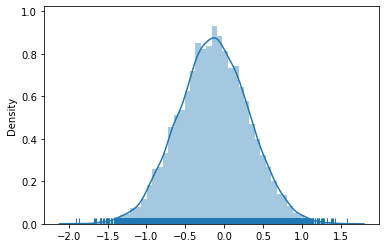

In [61]:
# Plot ddgs
sns.distplot(ddgs[forward], rug=True, label=titles[0])
# sns.distplot(np.array(ddgs[reverse])*-1, rug=True, label=titles[1])

In [62]:
forward_ddg = np.mean(ddgs[forward])
forward_ci = np.percentile(ddgs[forward], 2.5), np.percentile(ddgs[forward], 97.5)
# reverse_ddg = np.mean(ddgs[reverse])
# reverse_ci = np.percentile(ddgs[reverse], 2.5), np.percentile(ddgs[reverse], 97.5)
# negative_reverse_ci = sorted(np.array(reverse_ci)*-1)
# discrepancy = tuple(np.array(forward_ci) - np.array(negative_reverse_ci))
# output_kt = [forward_ddg, forward_ci, reverse_ddg, reverse_ci, discrepancy]
# output_kcalmol = [round(forward_ddg*KT_KCALMOL, 2), tuple([round(val, 2)for val in np.array(forward_ci)*KT_KCALMOL]), round(reverse_ddg*KT_KCALMOL, 2), tuple([round(val, 2) for val in np.array(reverse_ci)*KT_KCALMOL]), tuple([round(val, 2) for val in np.array(discrepancy)*KT_KCALMOL])]

output_kcalmol = [round(forward_ddg*KT_KCALMOL, 2), tuple([round(val, 2)for val in np.array(forward_ci)*KT_KCALMOL])]



In [63]:
output_kcalmol

[-0.08, (-0.61, 0.45)]

In [64]:
# pd.DataFrame([output_kcalmol]).to_csv(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{forward}/analysis_{titles[0]}_{titles[1]}.csv")

In [65]:
with open(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{forward}/dgs_phase.pickle", "wb") as f:
    pickle.dump(dgs_phase, f)
with open(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{forward}/ddgs.pickle", "wb") as f:
    pickle.dump(ddgs, f)

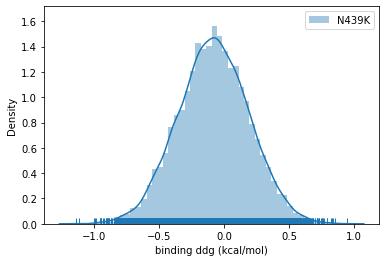

In [66]:
# Plot ddgs
sns.distplot(np.array(ddgs[forward])*KT_KCALMOL, rug=True, label=titles[0])
# sns.distplot(np.array(ddgs[reverse])*-KT_KCALMOL, rug=True, label=f"-({titles[1]})")
plt.xlabel("binding ddg (kcal/mol)")
plt.legend()

##  E484K

In [48]:
# Load data into dicts and plot 
titles = ["E484K"]
phases = ['complex', 'apo']
directions = ['forward', 'reverse']
d_input = {}
dir_num = 15
forward = 31
for i in tqdm_notebook([forward]):
    print(f"dir: {i}")
    d_works = {"complex": {}, "apo":{}}
    d_combined_works = {"complex": {}, "apo":{}}
    for phase in phases:
        for direction in directions:
            all_arrays = []
            for j in range(100):
                print(f"job: {j}")
                path = f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{i}/{i}_{phase}_{j}_{direction}.npy"
                try:
                    if os.path.exists(path):
                        with open(path, 'rb') as f:
                            array = np.load(f)
                            if not np.isnan(np.sum(array)):
                                all_arrays.append(array)
                            
                except:
                    continue
            print(len(all_arrays))
            if all_arrays:
                combined = np.concatenate(all_arrays)
                accumulated = np.array([cycle[-1] - cycle[0] for cycle in combined])
                combined = np.array([cycle[0::100] for cycle in combined])
                d_combined_works[phase][direction] = combined
                d_works[phase][direction] = accumulated
    
    d_input[i] = d_works
    
    # Plot
    complex_dg, complex_ddg = analyze(d_works['complex']['forward'], d_works['complex']['reverse'])
    apo_dg, apo_ddg = analyze(d_works['apo']['forward'], d_works['apo']['reverse'])
    plot(d_combined_works['complex']['forward'], d_combined_works['complex']['reverse'], complex_dg, complex_ddg, i, 'complex', os.path.dirname(path), titles[i-forward])
    plot(d_combined_works['apo']['forward'], d_combined_works['apo']['reverse'], apo_dg, apo_ddg, i, 'apo', os.path.dirname(path), titles[i-forward])
        

  0%|          | 0/1 [00:00<?, ?it/s]

dir: 31
job: 0
job: 1
job: 2
job: 3
job: 4
job: 5
shape: (1, 250001)
array.shape: (250001,)
job: 6
shape: (1, 250001)
array.shape: (250001,)
job: 7
shape: (1, 250001)
array.shape: (250001,)
job: 8
shape: (1, 250001)
array.shape: (250001,)
job: 9
shape: (1, 250001)
array.shape: (250001,)
job: 10
shape: (1, 250001)
array.shape: (250001,)
job: 11
shape: (1, 250001)
array.shape: (250001,)
job: 12
shape: (1, 250001)
array.shape: (250001,)
job: 13
shape: (1, 250001)
array.shape: (250001,)
job: 14
shape: (1, 250001)
array.shape: (250001,)
job: 15
shape: (1, 250001)
array.shape: (250001,)
job: 16
shape: (1, 250001)
array.shape: (250001,)
job: 17
shape: (1, 250001)
array.shape: (250001,)
job: 18
shape: (1, 250001)
array.shape: (250001,)
job: 19
shape: (1, 250001)
array.shape: (250001,)
job: 20
shape: (1, 250001)
array.shape: (250001,)
job: 21
shape: (1, 250001)
array.shape: (250001,)
job: 22
shape: (1, 250001)
array.shape: (250001,)
job: 23
shape: (1, 250001)
array.shape: (250001,)
job: 24
shap

job: 0
job: 1
job: 2
shape: (1, 250001)
array.shape: (250001,)
job: 3
shape: (1, 250001)
array.shape: (250001,)
job: 4
shape: (1, 250001)
array.shape: (250001,)
job: 5
shape: (1, 250001)
array.shape: (250001,)
job: 6
shape: (1, 250001)
array.shape: (250001,)
job: 7
shape: (1, 250001)
array.shape: (250001,)
job: 8
shape: (1, 250001)
array.shape: (250001,)
job: 9
shape: (1, 250001)
array.shape: (250001,)
job: 10
shape: (1, 250001)
array.shape: (250001,)
job: 11
shape: (1, 250001)
array.shape: (250001,)
job: 12
shape: (1, 250001)
array.shape: (250001,)
job: 13
shape: (1, 250001)
array.shape: (250001,)
job: 14
shape: (1, 250001)
array.shape: (250001,)
job: 15
shape: (1, 250001)
array.shape: (250001,)
job: 16
shape: (1, 250001)
array.shape: (250001,)
job: 17
shape: (1, 250001)
array.shape: (250001,)
job: 18
shape: (1, 250001)
array.shape: (250001,)
job: 19
shape: (1, 250001)
array.shape: (250001,)
job: 20
shape: (1, 250001)
array.shape: (250001,)
job: 21
shape: (1, 250001)
array.shape: (250

subtracting offset
plotting work trajs
saved to: /data/chodera/zhangi/perses_benchmark/neq/15/31/31_complex_work_traj.png
plotting work distrib
saved to: /data/chodera/zhangi/perses_benchmark/neq/15/31/31_complex_work_dist.png
subtracting offset
plotting work trajs
saved to: /data/chodera/zhangi/perses_benchmark/neq/15/31/31_apo_work_traj.png
plotting work distrib
saved to: /data/chodera/zhangi/perses_benchmark/neq/15/31/31_apo_work_dist.png


<Figure size 432x288 with 0 Axes>

In [52]:
# Bootstrap works
N_bootstraps = 10000
phases = ['complex', 'apo']
directions = ['forward', 'reverse']
dgs_phase = {}
ddgs = {}
for i in [forward]:
    dgs_phase_all = []
    ddgs_all = []
    for _ in tqdm_notebook(range(N_bootstraps)):
        # Initialize data structure for works
        d_works = {"complex": {"forward":{}, "reverse":{}}, "apo":{"forward":{}, "reverse":{}}}

        # Save subsampled works
        for phase in phases:
            for direction in directions:
                work_array = np.array(d_input[i][phase][direction])
                num_samples = work_array.shape[0]
                subsample_indices = np.random.choice(range(num_samples), num_samples)
                d_works[phase][direction] = work_array[subsample_indices]
        d_dgs_phase, binding_dg = analyze_bootstrap(d_works)
        dgs_phase_all.append(d_dgs_phase)
        ddgs_all.append(binding_dg)
    dgs_phase[i] = dgs_phase_all
    ddgs[i] = ddgs_all
    
    


  0%|          | 0/10000 [00:00<?, ?it/s]

<AxesSubplot:ylabel='Density'>

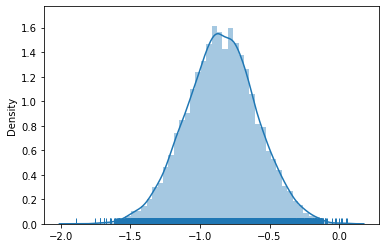

In [53]:
# Plot ddgs
sns.distplot(ddgs[forward], rug=True, label=titles[0])
# sns.distplot(np.array(ddgs[reverse])*-1, rug=True, label=titles[1])

In [54]:
forward_ddg = np.mean(ddgs[forward])
forward_ci = np.percentile(ddgs[forward], 2.5), np.percentile(ddgs[forward], 97.5)
# reverse_ddg = np.mean(ddgs[reverse])
# reverse_ci = np.percentile(ddgs[reverse], 2.5), np.percentile(ddgs[reverse], 97.5)
# negative_reverse_ci = sorted(np.array(reverse_ci)*-1)
# discrepancy = tuple(np.array(forward_ci) - np.array(negative_reverse_ci))
# output_kt = [forward_ddg, forward_ci, reverse_ddg, reverse_ci, discrepancy]
# output_kcalmol = [round(forward_ddg*KT_KCALMOL, 2), tuple([round(val, 2)for val in np.array(forward_ci)*KT_KCALMOL]), round(reverse_ddg*KT_KCALMOL, 2), tuple([round(val, 2) for val in np.array(reverse_ci)*KT_KCALMOL]), tuple([round(val, 2) for val in np.array(discrepancy)*KT_KCALMOL])]

output_kcalmol = [round(forward_ddg*KT_KCALMOL, 2), tuple([round(val, 2)for val in np.array(forward_ci)*KT_KCALMOL])]



In [55]:
output_kcalmol

[-0.5, (-0.81, -0.21)]

In [56]:
# pd.DataFrame([output_kcalmol]).to_csv(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{forward}/analysis_{titles[0]}_{titles[1]}.csv")

In [57]:
with open(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{forward}/dgs_phase.pickle", "wb") as f:
    pickle.dump(dgs_phase, f)
with open(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{forward}/ddgs.pickle", "wb") as f:
    pickle.dump(ddgs, f)

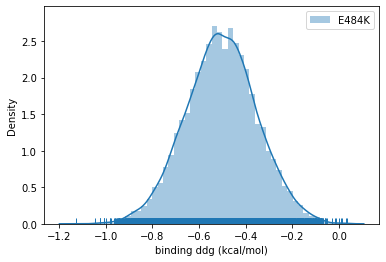

In [58]:
# Plot ddgs
sns.distplot(np.array(ddgs[forward])*KT_KCALMOL, rug=True, label=titles[0])
# sns.distplot(np.array(ddgs[reverse])*-KT_KCALMOL, rug=True, label=f"-({titles[1]})")
plt.xlabel("binding ddg (kcal/mol)")
plt.legend()

##  K417N

In [3]:
# Load data into dicts and plot 
titles = ["K417N"]
phases = ['complex', 'apo']
directions = ['forward', 'reverse']
d_input = {}
dir_num = 15
forward = 32
for i in tqdm_notebook([forward]):
    print(f"dir: {i}")
    d_works = {"complex": {}, "apo":{}}
    d_combined_works = {"complex": {}, "apo":{}}
    for phase in phases:
        for direction in directions:
            all_arrays = []
            for j in range(100):
                print(f"job: {j}")
                path = f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{i}/{i}_{phase}_{j}_{direction}.npy"
                try:
                    if os.path.exists(path):
                        with open(path, 'rb') as f:
                            array = np.load(f)
                            all_arrays.append(array)
                except:
                    continue
            print(len(all_arrays))
            if all_arrays:
                combined = np.concatenate(all_arrays)
                accumulated = np.array([cycle[-1] - cycle[0] for cycle in combined])
                combined = np.array([cycle[0::100] for cycle in combined])
                d_combined_works[phase][direction] = combined
                d_works[phase][direction] = accumulated
    
    d_input[i] = d_works
    
    # Plot
    complex_dg, complex_ddg = analyze(d_works['complex']['forward'], d_works['complex']['reverse'])
    apo_dg, apo_ddg = analyze(d_works['apo']['forward'], d_works['apo']['reverse'])
    plot(d_combined_works['complex']['forward'], d_combined_works['complex']['reverse'], complex_dg, complex_ddg, i, 'complex', os.path.dirname(path), titles[i-forward])
    plot(d_combined_works['apo']['forward'], d_combined_works['apo']['reverse'], apo_dg, apo_ddg, i, 'apo', os.path.dirname(path), titles[i-forward])
        

  0%|          | 0/1 [00:00<?, ?it/s]

dir: 32
job: 0
job: 1
job: 2
job: 3
job: 4
job: 5
job: 6
shape: (1, 250001)
array.shape: (250001,)
job: 7
shape: (1, 250001)
array.shape: (250001,)
job: 8
shape: (1, 250001)
array.shape: (250001,)
job: 9
shape: (1, 250001)
array.shape: (250001,)
job: 10
shape: (1, 250001)
array.shape: (250001,)
job: 11
shape: (1, 250001)
array.shape: (250001,)
job: 12
shape: (1, 250001)
array.shape: (250001,)
job: 13
shape: (1, 250001)
array.shape: (250001,)
job: 14
shape: (1, 250001)
array.shape: (250001,)
job: 15
shape: (1, 250001)
array.shape: (250001,)
job: 16
shape: (1, 250001)
array.shape: (250001,)
job: 17
shape: (1, 250001)
array.shape: (250001,)
job: 18
shape: (1, 250001)
array.shape: (250001,)
job: 19
shape: (1, 250001)
array.shape: (250001,)
job: 20
shape: (1, 250001)
array.shape: (250001,)
job: 21
shape: (1, 250001)
array.shape: (250001,)
job: 22
shape: (1, 250001)
array.shape: (250001,)
job: 23
shape: (1, 250001)
array.shape: (250001,)
job: 24
shape: (1, 250001)
array.shape: (250001,)
job:

shape: (1, 250001)
array.shape: (250001,)
job: 78
shape: (1, 250001)
array.shape: (250001,)
job: 79
shape: (1, 250001)
array.shape: (250001,)
job: 80
shape: (1, 250001)
array.shape: (250001,)
job: 81
shape: (1, 250001)
array.shape: (250001,)
job: 82
shape: (1, 250001)
array.shape: (250001,)
job: 83
shape: (1, 250001)
array.shape: (250001,)
job: 84
shape: (1, 250001)
array.shape: (250001,)
job: 85
shape: (1, 250001)
array.shape: (250001,)
job: 86
shape: (1, 250001)
array.shape: (250001,)
job: 87
shape: (1, 250001)
array.shape: (250001,)
job: 88
shape: (1, 250001)
array.shape: (250001,)
job: 89
shape: (1, 250001)
array.shape: (250001,)
job: 90
shape: (1, 250001)
array.shape: (250001,)
job: 91
shape: (1, 250001)
array.shape: (250001,)
job: 92
shape: (1, 250001)
array.shape: (250001,)
job: 93
shape: (1, 250001)
array.shape: (250001,)
job: 94
shape: (1, 250001)
array.shape: (250001,)
job: 95
shape: (1, 250001)
array.shape: (250001,)
job: 96
shape: (1, 250001)
array.shape: (250001,)
job: 97


shape: (1, 250001)
array.shape: (250001,)
job: 49
shape: (1, 250001)
array.shape: (250001,)
job: 50
shape: (1, 250001)
array.shape: (250001,)
job: 51
shape: (1, 250001)
array.shape: (250001,)
job: 52
shape: (1, 250001)
array.shape: (250001,)
job: 53
shape: (1, 250001)
array.shape: (250001,)
job: 54
shape: (1, 250001)
array.shape: (250001,)
job: 55
shape: (1, 250001)
array.shape: (250001,)
job: 56
shape: (1, 250001)
array.shape: (250001,)
job: 57
shape: (1, 250001)
array.shape: (250001,)
job: 58
shape: (1, 250001)
array.shape: (250001,)
job: 59
shape: (1, 250001)
array.shape: (250001,)
job: 60
shape: (1, 250001)
array.shape: (250001,)
job: 61
shape: (1, 250001)
array.shape: (250001,)
job: 62
shape: (1, 250001)
array.shape: (250001,)
job: 63
shape: (1, 250001)
array.shape: (250001,)
job: 64
shape: (1, 250001)
array.shape: (250001,)
job: 65
shape: (1, 250001)
array.shape: (250001,)
job: 66
shape: (1, 250001)
array.shape: (250001,)
job: 67
shape: (1, 250001)
array.shape: (250001,)
job: 68


<Figure size 432x288 with 0 Axes>

In [4]:
# Bootstrap works
N_bootstraps = 10000
phases = ['complex', 'apo']
directions = ['forward', 'reverse']
dgs_phase = {}
ddgs = {}
for i in [forward]:
    dgs_phase_all = []
    ddgs_all = []
    for _ in tqdm_notebook(range(N_bootstraps)):
        # Initialize data structure for works
        d_works = {"complex": {"forward":{}, "reverse":{}}, "apo":{"forward":{}, "reverse":{}}}

        # Save subsampled works
        for phase in phases:
            for direction in directions:
                work_array = np.array(d_input[i][phase][direction])
                num_samples = work_array.shape[0]
                subsample_indices = np.random.choice(range(num_samples), num_samples)
                d_works[phase][direction] = work_array[subsample_indices]
        d_dgs_phase, binding_dg = analyze_bootstrap(d_works)
        dgs_phase_all.append(d_dgs_phase)
        ddgs_all.append(binding_dg)
    dgs_phase[i] = dgs_phase_all
    ddgs[i] = ddgs_all
    
    


  0%|          | 0/10000 [00:00<?, ?it/s]

<AxesSubplot:ylabel='Density'>

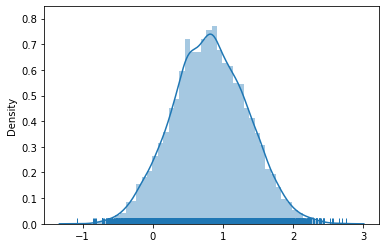

In [5]:
# Plot ddgs
sns.distplot(ddgs[forward], rug=True, label=titles[0])
# sns.distplot(np.array(ddgs[reverse])*-1, rug=True, label=titles[1])

In [6]:
forward_ddg = np.mean(ddgs[forward])
forward_ci = np.percentile(ddgs[forward], 2.5), np.percentile(ddgs[forward], 97.5)
# reverse_ddg = np.mean(ddgs[reverse])
# reverse_ci = np.percentile(ddgs[reverse], 2.5), np.percentile(ddgs[reverse], 97.5)
# negative_reverse_ci = sorted(np.array(reverse_ci)*-1)
# discrepancy = tuple(np.array(forward_ci) - np.array(negative_reverse_ci))
# output_kt = [forward_ddg, forward_ci, reverse_ddg, reverse_ci, discrepancy]
# output_kcalmol = [round(forward_ddg*KT_KCALMOL, 2), tuple([round(val, 2)for val in np.array(forward_ci)*KT_KCALMOL]), round(reverse_ddg*KT_KCALMOL, 2), tuple([round(val, 2) for val in np.array(reverse_ci)*KT_KCALMOL]), tuple([round(val, 2) for val in np.array(discrepancy)*KT_KCALMOL])]

output_kcalmol = [round(forward_ddg*KT_KCALMOL, 2), tuple([round(val, 2)for val in np.array(forward_ci)*KT_KCALMOL])]



In [7]:
output_kcalmol

[0.48, (-0.13, 1.1)]

In [8]:
# pd.DataFrame([output_kcalmol]).to_csv(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{forward}/analysis_{titles[0]}_{titles[1]}.csv")

In [9]:
with open(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{forward}/dgs_phase.pickle", "wb") as f:
    pickle.dump(dgs_phase, f)
with open(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{forward}/ddgs.pickle", "wb") as f:
    pickle.dump(ddgs, f)

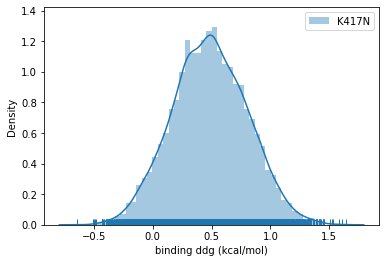

In [10]:
# Plot ddgs
sns.distplot(np.array(ddgs[forward])*KT_KCALMOL, rug=True, label=titles[0])
# sns.distplot(np.array(ddgs[reverse])*-KT_KCALMOL, rug=True, label=f"-({titles[1]})")
plt.xlabel("binding ddg (kcal/mol)")
plt.legend()

##  N487R

In [11]:
# Load data into dicts and plot 
titles = ["N487R"]
phases = ['complex', 'apo']
directions = ['forward', 'reverse']
d_input = {}
dir_num = 15
forward = 33
for i in tqdm_notebook([forward]):
    print(f"dir: {i}")
    d_works = {"complex": {}, "apo":{}}
    d_combined_works = {"complex": {}, "apo":{}}
    for phase in phases:
        for direction in directions:
            all_arrays = []
            for j in range(100):
                print(f"job: {j}")
                path = f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{i}/{i}_{phase}_{j}_{direction}.npy"
                try:
                    if os.path.exists(path):
                        with open(path, 'rb') as f:
                            array = np.load(f)
                            all_arrays.append(array)
                except:
                    continue
            print(len(all_arrays))
            if all_arrays:
                combined = np.concatenate(all_arrays)
                accumulated = np.array([cycle[-1] - cycle[0] for cycle in combined])
                combined = np.array([cycle[0::100] for cycle in combined])
                d_combined_works[phase][direction] = combined
                d_works[phase][direction] = accumulated
    
    d_input[i] = d_works
    
    # Plot
    complex_dg, complex_ddg = analyze(d_works['complex']['forward'], d_works['complex']['reverse'])
    apo_dg, apo_ddg = analyze(d_works['apo']['forward'], d_works['apo']['reverse'])
    plot(d_combined_works['complex']['forward'], d_combined_works['complex']['reverse'], complex_dg, complex_ddg, i, 'complex', os.path.dirname(path), titles[i-forward])
    plot(d_combined_works['apo']['forward'], d_combined_works['apo']['reverse'], apo_dg, apo_ddg, i, 'apo', os.path.dirname(path), titles[i-forward])
        

  0%|          | 0/1 [00:00<?, ?it/s]

dir: 33
job: 0
job: 1
job: 2
job: 3
job: 4
job: 5
shape: (1, 250001)
array.shape: (250001,)
job: 6
job: 7
shape: (1, 250001)
array.shape: (250001,)
job: 8
shape: (1, 250001)
array.shape: (250001,)
job: 9
shape: (1, 250001)
array.shape: (250001,)
job: 10
shape: (1, 250001)
array.shape: (250001,)
job: 11
shape: (1, 250001)
array.shape: (250001,)
job: 12
shape: (1, 250001)
array.shape: (250001,)
job: 13
shape: (1, 250001)
array.shape: (250001,)
job: 14
shape: (1, 250001)
array.shape: (250001,)
job: 15
shape: (1, 250001)
array.shape: (250001,)
job: 16
shape: (1, 250001)
array.shape: (250001,)
job: 17
shape: (1, 250001)
array.shape: (250001,)
job: 18
shape: (1, 250001)
array.shape: (250001,)
job: 19
shape: (1, 250001)
array.shape: (250001,)
job: 20
shape: (1, 250001)
array.shape: (250001,)
job: 21
shape: (1, 250001)
array.shape: (250001,)
job: 22
shape: (1, 250001)
array.shape: (250001,)
job: 23
shape: (1, 250001)
array.shape: (250001,)
job: 24
shape: (1, 250001)
array.shape: (250001,)
job:

shape: (1, 250001)
array.shape: (250001,)
job: 80
shape: (1, 250001)
array.shape: (250001,)
job: 81
shape: (1, 250001)
array.shape: (250001,)
job: 82
shape: (1, 250001)
array.shape: (250001,)
job: 83
shape: (1, 250001)
array.shape: (250001,)
job: 84
shape: (1, 250001)
array.shape: (250001,)
job: 85
shape: (1, 250001)
array.shape: (250001,)
job: 86
shape: (1, 250001)
array.shape: (250001,)
job: 87
shape: (1, 250001)
array.shape: (250001,)
job: 88
shape: (1, 250001)
array.shape: (250001,)
job: 89
shape: (1, 250001)
array.shape: (250001,)
job: 90
shape: (1, 250001)
array.shape: (250001,)
job: 91
shape: (1, 250001)
array.shape: (250001,)
job: 92
shape: (1, 250001)
array.shape: (250001,)
job: 93
shape: (1, 250001)
array.shape: (250001,)
job: 94
shape: (1, 250001)
array.shape: (250001,)
job: 95
shape: (1, 250001)
array.shape: (250001,)
job: 96
shape: (1, 250001)
array.shape: (250001,)
job: 97
shape: (1, 250001)
array.shape: (250001,)
job: 98
shape: (1, 250001)
array.shape: (250001,)
job: 99


shape: (1, 250001)
array.shape: (250001,)
job: 54
shape: (1, 250001)
array.shape: (250001,)
job: 55
shape: (1, 250001)
array.shape: (250001,)
job: 56
shape: (1, 250001)
array.shape: (250001,)
job: 57
shape: (1, 250001)
array.shape: (250001,)
job: 58
shape: (1, 250001)
array.shape: (250001,)
job: 59
shape: (1, 250001)
array.shape: (250001,)
job: 60
shape: (1, 250001)
array.shape: (250001,)
job: 61
shape: (1, 250001)
array.shape: (250001,)
job: 62
shape: (1, 250001)
array.shape: (250001,)
job: 63
shape: (1, 250001)
array.shape: (250001,)
job: 64
shape: (1, 250001)
array.shape: (250001,)
job: 65
shape: (1, 250001)
array.shape: (250001,)
job: 66
shape: (1, 250001)
array.shape: (250001,)
job: 67
shape: (1, 250001)
array.shape: (250001,)
job: 68
shape: (1, 250001)
array.shape: (250001,)
job: 69
shape: (1, 250001)
array.shape: (250001,)
job: 70
shape: (1, 250001)
array.shape: (250001,)
job: 71
shape: (1, 250001)
array.shape: (250001,)
job: 72
shape: (1, 250001)
array.shape: (250001,)
job: 73


<Figure size 432x288 with 0 Axes>

In [12]:
# Bootstrap works
N_bootstraps = 10000
phases = ['complex', 'apo']
directions = ['forward', 'reverse']
dgs_phase = {}
ddgs = {}
for i in [forward]:
    dgs_phase_all = []
    ddgs_all = []
    for _ in tqdm_notebook(range(N_bootstraps)):
        # Initialize data structure for works
        d_works = {"complex": {"forward":{}, "reverse":{}}, "apo":{"forward":{}, "reverse":{}}}

        # Save subsampled works
        for phase in phases:
            for direction in directions:
                work_array = np.array(d_input[i][phase][direction])
                num_samples = work_array.shape[0]
                subsample_indices = np.random.choice(range(num_samples), num_samples)
                d_works[phase][direction] = work_array[subsample_indices]
        d_dgs_phase, binding_dg = analyze_bootstrap(d_works)
        dgs_phase_all.append(d_dgs_phase)
        ddgs_all.append(binding_dg)
    dgs_phase[i] = dgs_phase_all
    ddgs[i] = ddgs_all
    
    


  0%|          | 0/10000 [00:00<?, ?it/s]

<AxesSubplot:ylabel='Density'>

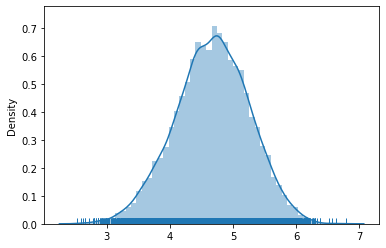

In [13]:
# Plot ddgs
sns.distplot(ddgs[forward], rug=True, label=titles[0])
# sns.distplot(np.array(ddgs[reverse])*-1, rug=True, label=titles[1])

In [14]:
forward_ddg = np.mean(ddgs[forward])
forward_ci = np.percentile(ddgs[forward], 2.5), np.percentile(ddgs[forward], 97.5)
# reverse_ddg = np.mean(ddgs[reverse])
# reverse_ci = np.percentile(ddgs[reverse], 2.5), np.percentile(ddgs[reverse], 97.5)
# negative_reverse_ci = sorted(np.array(reverse_ci)*-1)
# discrepancy = tuple(np.array(forward_ci) - np.array(negative_reverse_ci))
# output_kt = [forward_ddg, forward_ci, reverse_ddg, reverse_ci, discrepancy]
# output_kcalmol = [round(forward_ddg*KT_KCALMOL, 2), tuple([round(val, 2)for val in np.array(forward_ci)*KT_KCALMOL]), round(reverse_ddg*KT_KCALMOL, 2), tuple([round(val, 2) for val in np.array(reverse_ci)*KT_KCALMOL]), tuple([round(val, 2) for val in np.array(discrepancy)*KT_KCALMOL])]

output_kcalmol = [round(forward_ddg*KT_KCALMOL, 2), tuple([round(val, 2)for val in np.array(forward_ci)*KT_KCALMOL])]



In [15]:
output_kcalmol

[2.78, (2.07, 3.45)]

In [16]:
# pd.DataFrame([output_kcalmol]).to_csv(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{forward}/analysis_{titles[0]}_{titles[1]}.csv")

In [17]:
with open(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{forward}/dgs_phase.pickle", "wb") as f:
    pickle.dump(dgs_phase, f)
with open(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{forward}/ddgs.pickle", "wb") as f:
    pickle.dump(ddgs, f)

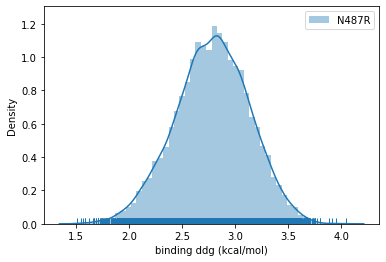

In [18]:
# Plot ddgs
sns.distplot(np.array(ddgs[forward])*KT_KCALMOL, rug=True, label=titles[0])
# sns.distplot(np.array(ddgs[reverse])*-KT_KCALMOL, rug=True, label=f"-({titles[1]})")
plt.xlabel("binding ddg (kcal/mol)")
plt.legend()

##  N501D

In [19]:
# Load data into dicts and plot 
titles = ["N501D"]
phases = ['complex', 'apo']
directions = ['forward', 'reverse']
d_input = {}
dir_num = 15
forward = 34
for i in tqdm_notebook([forward]):
    print(f"dir: {i}")
    d_works = {"complex": {}, "apo":{}}
    d_combined_works = {"complex": {}, "apo":{}}
    for phase in phases:
        for direction in directions:
            all_arrays = []
            for j in range(100):
                print(f"job: {j}")
                path = f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{i}/{i}_{phase}_{j}_{direction}.npy"
                try:
                    if os.path.exists(path):
                        with open(path, 'rb') as f:
                            array = np.load(f)
                            all_arrays.append(array)
                except:
                    continue
            print(len(all_arrays))
            if all_arrays:
                combined = np.concatenate(all_arrays)
                accumulated = np.array([cycle[-1] - cycle[0] for cycle in combined])
                combined = np.array([cycle[0::100] for cycle in combined])
                d_combined_works[phase][direction] = combined
                d_works[phase][direction] = accumulated
    
    d_input[i] = d_works
    
    # Plot
    complex_dg, complex_ddg = analyze(d_works['complex']['forward'], d_works['complex']['reverse'])
    apo_dg, apo_ddg = analyze(d_works['apo']['forward'], d_works['apo']['reverse'])
    plot(d_combined_works['complex']['forward'], d_combined_works['complex']['reverse'], complex_dg, complex_ddg, i, 'complex', os.path.dirname(path), titles[i-forward])
    plot(d_combined_works['apo']['forward'], d_combined_works['apo']['reverse'], apo_dg, apo_ddg, i, 'apo', os.path.dirname(path), titles[i-forward])
        

  0%|          | 0/1 [00:00<?, ?it/s]

dir: 34
job: 0
job: 1
job: 2
job: 3
job: 4
shape: (1, 250001)
array.shape: (250001,)
job: 5
shape: (1, 250001)
array.shape: (250001,)
job: 6
shape: (1, 250001)
array.shape: (250001,)
job: 7
shape: (1, 250001)
array.shape: (250001,)
job: 8
shape: (1, 250001)
array.shape: (250001,)
job: 9
shape: (1, 250001)
array.shape: (250001,)
job: 10
shape: (1, 250001)
array.shape: (250001,)
job: 11
shape: (1, 250001)
array.shape: (250001,)
job: 12
shape: (1, 250001)
array.shape: (250001,)
job: 13
shape: (1, 250001)
array.shape: (250001,)
job: 14
shape: (1, 250001)
array.shape: (250001,)
job: 15
shape: (1, 250001)
array.shape: (250001,)
job: 16
shape: (1, 250001)
array.shape: (250001,)
job: 17
shape: (1, 250001)
array.shape: (250001,)
job: 18
shape: (1, 250001)
array.shape: (250001,)
job: 19
shape: (1, 250001)
array.shape: (250001,)
job: 20
shape: (1, 250001)
array.shape: (250001,)
job: 21
shape: (1, 250001)
array.shape: (250001,)
job: 22
shape: (1, 250001)
array.shape: (250001,)
job: 23
shape: (1, 2

shape: (1, 250001)
array.shape: (250001,)
job: 72
shape: (1, 250001)
array.shape: (250001,)
job: 73
shape: (1, 250001)
array.shape: (250001,)
job: 74
shape: (1, 250001)
array.shape: (250001,)
job: 75
shape: (1, 250001)
array.shape: (250001,)
job: 76
shape: (1, 250001)
array.shape: (250001,)
job: 77
shape: (1, 250001)
array.shape: (250001,)
job: 78
shape: (1, 250001)
array.shape: (250001,)
job: 79
shape: (1, 250001)
array.shape: (250001,)
job: 80
shape: (1, 250001)
array.shape: (250001,)
job: 81
shape: (1, 250001)
array.shape: (250001,)
job: 82
shape: (1, 250001)
array.shape: (250001,)
job: 83
shape: (1, 250001)
array.shape: (250001,)
job: 84
shape: (1, 250001)
array.shape: (250001,)
job: 85
shape: (1, 250001)
array.shape: (250001,)
job: 86
shape: (1, 250001)
array.shape: (250001,)
job: 87
shape: (1, 250001)
array.shape: (250001,)
job: 88
shape: (1, 250001)
array.shape: (250001,)
job: 89
shape: (1, 250001)
array.shape: (250001,)
job: 90
shape: (1, 250001)
array.shape: (250001,)
job: 91


shape: (1, 250001)
array.shape: (250001,)
job: 46
shape: (1, 250001)
array.shape: (250001,)
job: 47
shape: (1, 250001)
array.shape: (250001,)
job: 48
shape: (1, 250001)
array.shape: (250001,)
job: 49
shape: (1, 250001)
array.shape: (250001,)
job: 50
shape: (1, 250001)
array.shape: (250001,)
job: 51
shape: (1, 250001)
array.shape: (250001,)
job: 52
shape: (1, 250001)
array.shape: (250001,)
job: 53
shape: (1, 250001)
array.shape: (250001,)
job: 54
shape: (1, 250001)
array.shape: (250001,)
job: 55
shape: (1, 250001)
array.shape: (250001,)
job: 56
shape: (1, 250001)
array.shape: (250001,)
job: 57
shape: (1, 250001)
array.shape: (250001,)
job: 58
shape: (1, 250001)
array.shape: (250001,)
job: 59
shape: (1, 250001)
array.shape: (250001,)
job: 60
shape: (1, 250001)
array.shape: (250001,)
job: 61
shape: (1, 250001)
array.shape: (250001,)
job: 62
shape: (1, 250001)
array.shape: (250001,)
job: 63
shape: (1, 250001)
array.shape: (250001,)
job: 64
shape: (1, 250001)
array.shape: (250001,)
job: 65


<Figure size 432x288 with 0 Axes>

In [20]:
# Bootstrap works
N_bootstraps = 10000
phases = ['complex', 'apo']
directions = ['forward', 'reverse']
dgs_phase = {}
ddgs = {}
for i in [forward]:
    dgs_phase_all = []
    ddgs_all = []
    for _ in tqdm_notebook(range(N_bootstraps)):
        # Initialize data structure for works
        d_works = {"complex": {"forward":{}, "reverse":{}}, "apo":{"forward":{}, "reverse":{}}}

        # Save subsampled works
        for phase in phases:
            for direction in directions:
                work_array = np.array(d_input[i][phase][direction])
                num_samples = work_array.shape[0]
                subsample_indices = np.random.choice(range(num_samples), num_samples)
                d_works[phase][direction] = work_array[subsample_indices]
        d_dgs_phase, binding_dg = analyze_bootstrap(d_works)
        dgs_phase_all.append(d_dgs_phase)
        ddgs_all.append(binding_dg)
    dgs_phase[i] = dgs_phase_all
    ddgs[i] = ddgs_all
    
    


  0%|          | 0/10000 [00:00<?, ?it/s]

<AxesSubplot:ylabel='Density'>

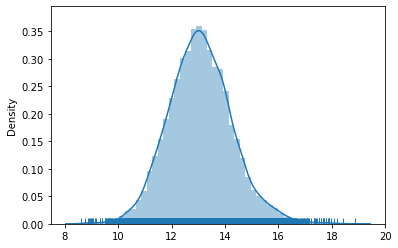

In [21]:
# Plot ddgs
sns.distplot(ddgs[forward], rug=True, label=titles[0])
# sns.distplot(np.array(ddgs[reverse])*-1, rug=True, label=titles[1])

In [22]:
forward_ddg = np.mean(ddgs[forward])
forward_ci = np.percentile(ddgs[forward], 2.5), np.percentile(ddgs[forward], 97.5)
# reverse_ddg = np.mean(ddgs[reverse])
# reverse_ci = np.percentile(ddgs[reverse], 2.5), np.percentile(ddgs[reverse], 97.5)
# negative_reverse_ci = sorted(np.array(reverse_ci)*-1)
# discrepancy = tuple(np.array(forward_ci) - np.array(negative_reverse_ci))
# output_kt = [forward_ddg, forward_ci, reverse_ddg, reverse_ci, discrepancy]
# output_kcalmol = [round(forward_ddg*KT_KCALMOL, 2), tuple([round(val, 2)for val in np.array(forward_ci)*KT_KCALMOL]), round(reverse_ddg*KT_KCALMOL, 2), tuple([round(val, 2) for val in np.array(reverse_ci)*KT_KCALMOL]), tuple([round(val, 2) for val in np.array(discrepancy)*KT_KCALMOL])]

output_kcalmol = [round(forward_ddg*KT_KCALMOL, 2), tuple([round(val, 2)for val in np.array(forward_ci)*KT_KCALMOL])]



In [23]:
output_kcalmol

[7.79, (6.45, 9.3)]

In [24]:
# pd.DataFrame([output_kcalmol]).to_csv(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{forward}/analysis_{titles[0]}_{titles[1]}.csv")

In [25]:
with open(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{forward}/dgs_phase.pickle", "wb") as f:
    pickle.dump(dgs_phase, f)
with open(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{forward}/ddgs.pickle", "wb") as f:
    pickle.dump(ddgs, f)

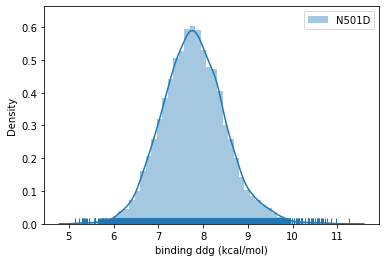

In [26]:
# Plot ddgs
sns.distplot(np.array(ddgs[forward])*KT_KCALMOL, rug=True, label=titles[0])
# sns.distplot(np.array(ddgs[reverse])*-KT_KCALMOL, rug=True, label=f"-({titles[1]})")
plt.xlabel("binding ddg (kcal/mol)")
plt.legend()